### Replication of cookbook simulation
this attempts to do https://github.com/ipython-books/cookbook-2nd-code/blob/master/chapter12_deterministic/03_ode.ipynb but with the more modern scipy.integrate.solve_ivp

In [1]:
import numpy as np
import scipy.integrate  # changed this
import matplotlib.pyplot as plt  # almost every imports this way

In [2]:
v0 = np.zeros(4)  # The initial position is (0, 0).
# The initial speed vector is oriented
# to the top right.
v0[2] = 4.  # vx??
v0[3] = 10.  # vy??
# source also defined constants m, g, and k
# they should not have defined k because it is an input to f

In [3]:
# this will be redefined for subsequent work
# old: f(v, t, k)
def f(t, v):
    # v has four components: v=[u, u'].
    u, udot = v[:2], v[2:]  # ah, udot is dx and dy
    # We compute the second derivative u'' of u.
    udotdot = -f.k / (1.1) * udot  # not really sure
    udotdot[1] -= 9.8  # dvy
    # output type is changed
    # [dx, dy, dvx, dvy]
    return [udot[0], udot[1], udotdot[0], udotdot[1]]
    # We return v'=[u', u''].
    # return np.r_[udot, udotdot]

In [4]:
# printin stuff
print(v0)

[ 0.  0.  4. 10.]


(0, 6)

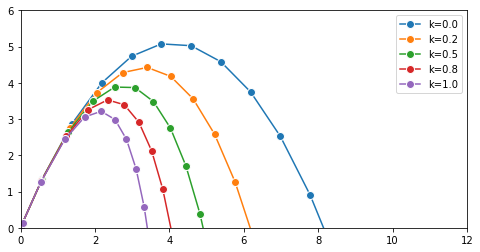

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

# We want to evaluate the system on 30 linearly
# spaced times between t=0 and t=3.
t = np.linspace(0., 3., 30)  # remember 3., for duration of simulation in seconds

# We simulate the system for different values of k.
for k in np.linspace(0., 1., 5):
    f.k = k  # do what you gotta do
    # v = spi.odeint(f, v0, t)
    # this simulation was with scipy.integrate.odeint before
    v = scipy.integrate.solve_ivp(f, (0., 3.), v0, max_step=0.2)
    # v = [list(p) for p in v]  # convert to python list type, it returns a numpy.ndarray
    #v = np.ndarray(v)
    # We plot the particle's trajectory.
    # the dimensions have swapped
    ax.plot(v.y[0, :], v.y[1, :], 'o-', mew=1, ms=8, mec='w', label=f'k={k:.1f}')
ax.legend()
ax.set_xlim(0, 12)
ax.set_ylim(0, 6)

In [38]:
# from the old data
print(type(v))
print(len(v))
print(v[0])

<class 'numpy.ndarray'>
30
[ 0.  0.  4. 10.]


In [52]:
# new data
print([list(p) for p in v])

[['t'], ['y'], ['s', 'o', 'l'], ['t', '_', 'e', 'v', 'e', 'n', 't', 's'], ['n', 'f', 'e', 'v'], ['n', 'j', 'e', 'v'], ['n', 'l', 'u'], ['s', 't', 'a', 't', 'u', 's'], ['m', 'e', 's', 's', 'a', 'g', 'e'], ['s', 'u', 'c', 'c', 'e', 's', 's']]


In [44]:
type(v)

numpy.ndarray

In [58]:
type(v.y)

numpy.ndarray

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 50
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 1.31283457e-04, 1.44411803e-03, 1.45724637e-02,
       1.45855921e-01, 7.93922390e-01, 1.56199366e+00, 2.41152392e+00,
       3.00000000e+00])
 t_events: None
        y: array([[ 0.00000000e+00,  5.25102492e-04,  5.77268199e-03,
         5.79054511e-02,  5.46398173e-01,  2.26196741e+00,
         3.33632083e+00,  3.90853999e+00,  4.11215636e+00],
       [ 0.00000000e+00,  1.31267178e-03,  1.44214906e-02,
         1.43727660e-01,  1.26621168e+00,  3.19243735e+00,
         4.93895011e-01, -5.69136256e+00, -1.09773477e+01],
       [ 4.00000000e+00,  3.99952263e+00,  3.99475211e+00,
         3.94735868e+00,  3.50327439e+00,  1.94366599e+00,
         9.66981062e-01,  4.46781824e-01,  2.61676034e-01],
       [ 1.00000000e+01,  9.99752008e+00,  9.97273720e+00,
         9.72652835e+00,  7.41951045

In [81]:
len(v.y[0])

9

In [82]:
len(v.y)

4